In [1]:
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [3]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [4]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'Deep Learning')
sub_dir = os.path.join(root_dir, 'sub')

# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

False

In [5]:
train = pd.read_csv(os.path.join(data_dir,'Identify_The_Digits' ,'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Identify_The_Digits','test.csv'))

sample_submission = pd.read_csv(os.path.join(data_dir,'Identify_The_Digits', 'Sample_Submission.csv'))

In [6]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [7]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


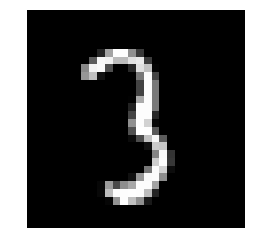

In [8]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Identify_The_Digits', 'images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [10]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Identify_The_Digits', 'images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0 
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Identify_The_Digits', 'images' ,'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [11]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [13]:
train_x.shape

(34300, 784)

In [14]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
        
    Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

C:\Users\user\Anaconda3\envs\keras_tf\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  from ipykernel import kernelapp as app
C:\Users\user\Anaconda3\envs\keras_tf\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [19]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

C:\Users\user\Anaconda3\envs\keras_tf\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 3s - loss: 0.5540 - acc: 0.8515 - val_loss: 0.3104 - val_acc: 0.9139
Epoch 2/5
34300/34300 [==============================] - 1s - loss: 0.2606 - acc: 0.9274 - val_loss: 0.2478 - val_acc: 0.9328
Epoch 3/5
34300/34300 [==============================] - 1s - loss: 0.2109 - acc: 0.9405 - val_loss: 0.2152 - val_acc: 0.9408
Epoch 4/5
34300/34300 [==============================] - 1s - loss: 0.1779 - acc: 0.9497 - val_loss: 0.1942 - val_acc: 0.9466
Epoch 5/5
34300/34300 [==============================] - 1s - loss: 0.1544 - acc: 0.9553 - val_loss: 0.1768 - val_acc: 0.9497


In [20]:
pred = model.predict_classes(test_x)

20864/21000 [============================>.] - ETA: 0s

Prediction is:  2


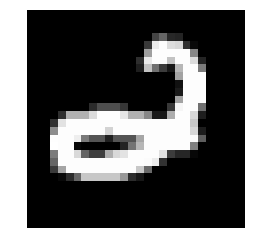

In [23]:
img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Identify_The_Digits', 'images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [24]:
sample_submission.filename = test.filename; sample_submission.label = pred

In [26]:
sample_submission.to_csv(os.path.join(data_dir, 'sub02.csv'), index=False)